In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train[train['Pclass']==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
train = pd.DataFrame(train)

In [7]:
# train = train.dropna(axis=1) # dropping null values
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

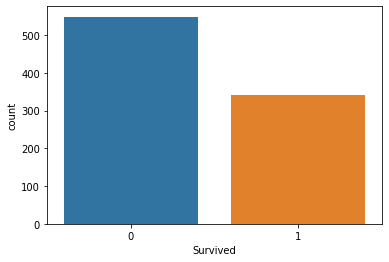

In [9]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

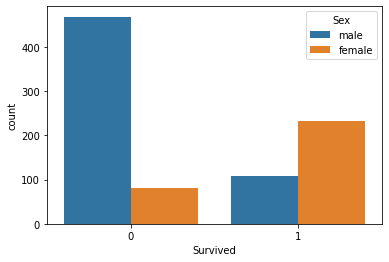

In [10]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

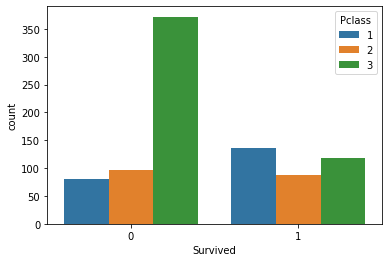

In [11]:
sns.countplot(x='Survived',data=train,hue='Pclass')

D:\Persnol_Documents\TOOLS\temp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

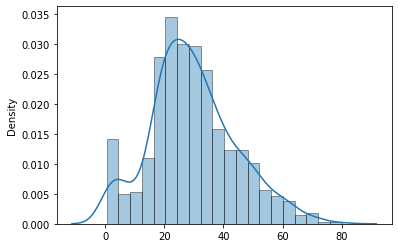

In [12]:
sns.distplot(x=train['Age'].dropna(),kde=31,hist_kws=dict(edgecolor='black'))

In [13]:
import cufflinks as cf

In [14]:
cf.go_offline()

In [15]:
train["Fare"].iplot(kind='hist')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

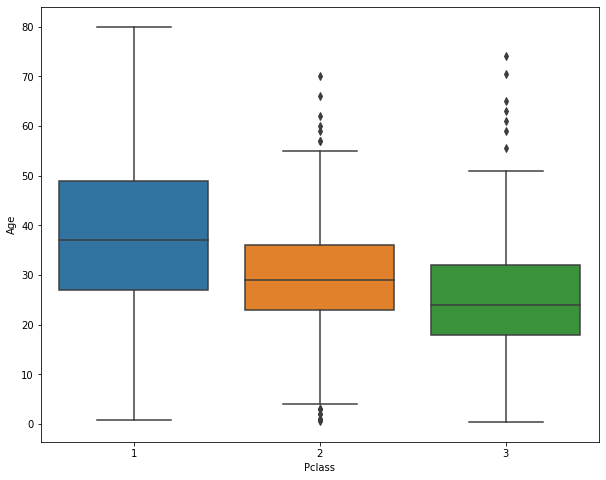

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass',y='Age',data=train,)

In [17]:
# setting null ages with mean of most corresponding Pclass
def set_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return train[train['Pclass']==1]['Age'].mean()
        if(Pclass==2):
            return train[train['Pclass']==2]['Age'].mean()
        if(Pclass==3):
            return train[train['Pclass']==3]['Age'].mean()
    else:
        return Age

In [18]:
train['Age'] = train[['Age','Pclass']].apply(set_age,axis=1)

In [19]:
train[train['Pclass']==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.00000,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00000,0,5,382652,29.1250,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S


In [20]:
train['Age'].iplot(kind='hist')

<AxesSubplot:>

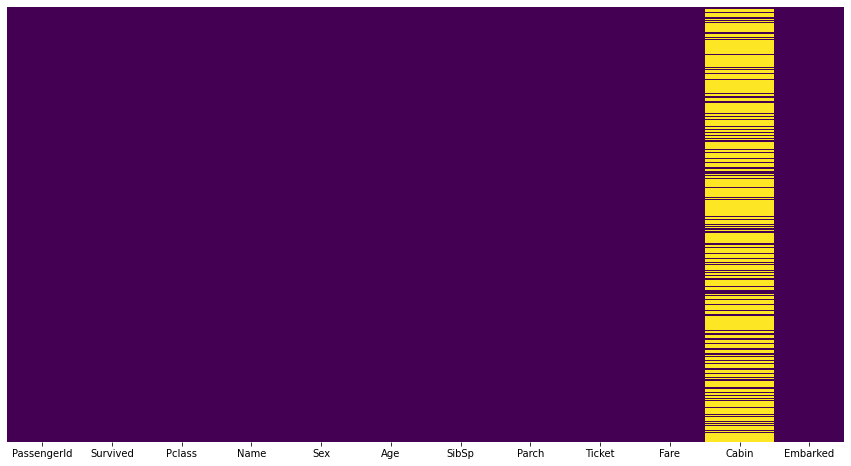

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train.drop('Cabin',axis=1,inplace=True)

In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [25]:
embark =pd.get_dummies(train['Embarked'],drop_first=True)

In [26]:
train = pd.concat([train,sex,embark],axis=1)

In [27]:
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [28]:
train.drop('PassengerId',axis=1,inplace=True)

In [29]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

# Test

In [31]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','S']]
y = train['Survived']

In [32]:
import sklearn

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log = LogisticRegression()
log

LogisticRegression()

In [37]:
log.fit(X_train,y_train)

D:\Persnol_Documents\TOOLS\temp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [38]:
predictions = log.predict(X_test)

# classification report

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       169
           1       0.80      0.69      0.74       126

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



# confustion matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
print(confusion_matrix(y_test,predictions))

[[147  22]
 [ 39  87]]


D:\Persnol_Documents\TOOLS\temp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Survived', ylabel='Density'>

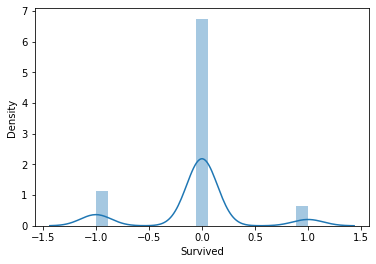

In [43]:
sns.distplot(predictions-y_test)

In [44]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.4547303167999129